In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_stata('../../../HCMST 2017 fresh sample for public sharing draft v1.1.dta')

In [3]:
chosen_cols = [
    'time_from_met_to_rel',  # numeryczna - czas (w latach), który upłynął od poznania do wejścia w związek
    'time_from_rel_to_cohab', # numeryczna - czas (w latach), który upłynął od wejścia w związek do zamieszkania razem
    'Q25',  # jakościowa - czy uczęszczałeś z partnerem do tej samej szkoły średniej
    'Q12', # jakościowa - jak partner opisuje swoje poglądy polityczne
    'S1',  # output
]
df[chosen_cols].head()

,time_from_met_to_rel,time_from_rel_to_cohab,Q25,Q12,S1
0,0.000000,NaN,NaN,NaN,"No, I am not Married"
1,12.250000,0.500000,Different High School,Leans Republican,"Yes, I am Married"
2,0.416748,0.083252,Different High School,Leans Democrat,"Yes, I am Married"
3,1.083252,NaN,NaN,NaN,"No, I am not Married"
4,0.083252,0.833374,Different High School,Strong Democrat,"Yes, I am Married"


In [4]:
# kilka parametrów danych
print(df[chosen_cols].count())  # liczba niepustych wartości w każdej kolumnie 
print('=' * 30)
print('before drop:', len(df[chosen_cols]))
print('after drop:', len(df[chosen_cols].dropna()))  # liczba wierszy przed i po usunięciu niekompletnych wierszy

cleaner_df = df[chosen_cols].dropna()
cleaner_df['S1'] = cleaner_df['S1'].apply(lambda x: 1 if x == 'Yes, I am Married' else 0)
cleaner_df['S1'] = cleaner_df['S1'].astype('float')  # przekształcenie kolumny wynikowej do postaci 0/1
final_df = pd.get_dummies(cleaner_df)  # one-hot encodding
final_df

time_from_met_to_rel      3263
time_from_rel_to_cohab    2578
Q25                       2856
Q12                       2856
S1                        3510
dtype: int64
before drop: 3510
after drop: 2354


,time_from_met_to_rel,time_from_rel_to_cohab,S1,Q25_Refused,Q25_Same High School,Q25_Different High School,Q12_Refused,Q12_Strong Republican,Q12_Not Strong Republican,Q12_Leans Republican,Q12_Undecided/Independent/Other,Q12_Leans Democrat,Q12_Not Strong Democrat,Q12_Strong Democrat
1,12.250000,0.500000,1.0,0,0,1,0,0,0,1,0,0,0,0
2,0.416748,0.083252,1.0,0,0,1,0,0,0,0,0,1,0,0
4,0.083252,0.833374,1.0,0,0,1,0,0,0,0,0,0,0,1
5,0.500000,0.000000,1.0,0,0,1,0,0,0,0,1,0,0,0
6,0.250000,2.583374,1.0,0,0,1,0,0,0,1,0,0,0,0
7,0.083374,3.166626,1.0,0,1,0,0,0,0,0,0,1,0,0
10,0.000000,0.333374,1.0,0,0,1,0,0,0,0,0,1,0,0
14,4.083374,1.333374,1.0,0,0,1,0,0,0,0,0,0,1,0
15,2.000000,1.583374,1.0,0,0,1,0,0,0,0,0,0,0,1
16,0.083252,5.916748,0.0,0,0,1,0,0,0,0,1,0,0,0


In [5]:
X = final_df.loc[:, final_df.columns != 'S1']
y = final_df.loc[:, 'S1']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)
print(X_train.describe())
print(y_train.describe())  # podział danych na zbiór treningowy i testowy i zobaczenie parametrów każdej kolumny

       time_from_met_to_rel  time_from_rel_to_cohab  Q25_Refused  \
count           1647.000000             1647.000000  1647.000000   
mean               1.524589                1.944142     0.001821   
std                4.230605                2.629245     0.042653   
min                0.000000                0.000000     0.000000   
25%                0.000000                0.416626     0.000000   
50%                0.166748                1.083374     0.000000   
75%                1.000000                2.500000     0.000000   
max               46.833374               31.500000     1.000000   

       Q25_Same High School  Q25_Different High School  Q12_Refused  \
count           1647.000000                1647.000000  1647.000000   
mean               0.154827                   0.843352     0.005464   
std                0.361850                   0.363579     0.073742   
min                0.000000                   0.000000     0.000000   
25%                0.000000     

In [8]:
def report(results, n_top=3):  # skopiowane ze strony sk-learna - wypisanie podsumowania sprawdzonego modelu
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [9]:
clf = RandomForestClassifier(n_jobs=-1)
param_grid = {
    "n_estimators": range(2, 103, 20),
    "max_depth": [3, 5, 7],
    "max_features": range(1, 8, 2),
    "min_samples_split": range(2, 7, 2),
}

grid_search_classifier = GridSearchCV(clf, param_grid=param_grid, cv=5)  # poszukiwanie najlepszego modelu
grid_search_classifier.fit(X_train, y_train)
report(grid_search_classifier.cv_results_)

Model with rank: 1
Mean validation score: 0.830 (std: 0.002)
Parameters: {'max_depth': 3, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 42}

Model with rank: 1
Mean validation score: 0.830 (std: 0.002)
Parameters: {'max_depth': 3, 'max_features': 7, 'min_samples_split': 4, 'n_estimators': 102}

Model with rank: 1
Mean validation score: 0.830 (std: 0.002)
Parameters: {'max_depth': 5, 'max_features': 7, 'min_samples_split': 4, 'n_estimators': 42}



In [10]:
y_pred = grid_search_classifier.predict(X_test)
np.sum(y_test.values == y_pred) / len(y_test)  # accuracy na zb. testowym

0.8274398868458275

In [11]:
# test na przykładowej próbce
changing_observation = np.array([0.166748, 1.083374, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])
marriage_proba = grid_search_classifier.predict_proba([changing_observation])[0][1]
marriage_proba

0.7956076217069181

In [93]:
def ceteris_paribus_log_scale(model, example, var_pos, upper_bound):
    # funkcja zwracająca współrzędne do wykresu ceteris paribus dla wybranego przykładu i zmiennej (ze względu na 
    # rozkład wybranych zmiennych numerycznych skala logarytmiczna)
    changing_observation = example.copy()
    var_value = 0.001
    var_points = []
    proba_points = []
    while var_value < upper_bound:
        changing_observation[var_pos] = var_value
        pred_proba = model.predict_proba([changing_observation])[0][1]
        var_points.append(var_value)
        proba_points.append(pred_proba)
        var_value *= 1.1
    return var_points, proba_points

In [90]:
def ALE_plot(model, data, column, num_of_intervals):
    # funkcja zwracjąca współrzedne do wykresu ALE_plot wybranegej zmiennej dla zadanej liczby przedziałów
    intervals_df = pd.qcut(data[column], num_of_intervals, duplicates='drop')

    data_left = data.copy()
    data_left.loc[:, column] = intervals_df.apply(lambda x: x.left)
    
    data_right = data.copy()
    data_right.loc[:, column] = intervals_df.apply(lambda x: x.right)
    
    left_preds = model.predict_proba(data_left)[:, 1]
    right_preds = model.predict_proba(data_right)[:, 1]
    
    intervals_df.index = range(len(intervals_df))
    intervals_df = pd.concat([intervals_df, pd.Series(right_preds - left_preds, name='proba_diff')], axis=1)
    
    intervals = [(i.right, intervals_df.loc[intervals_df[column] == i, 'proba_diff'].mean(), np.sum(intervals_df[column] == i))
                 for i in sorted(intervals_df[column].unique())]
    cumsum = 0
    intervals_with_cs = [(0, 0, 0, 0)]
    for i in intervals:
        cumsum += i[1]
        intervals_with_cs.append(i + (cumsum,))
    
    return ([i[0] for i in intervals_with_cs], [i[3] for i in intervals_with_cs])

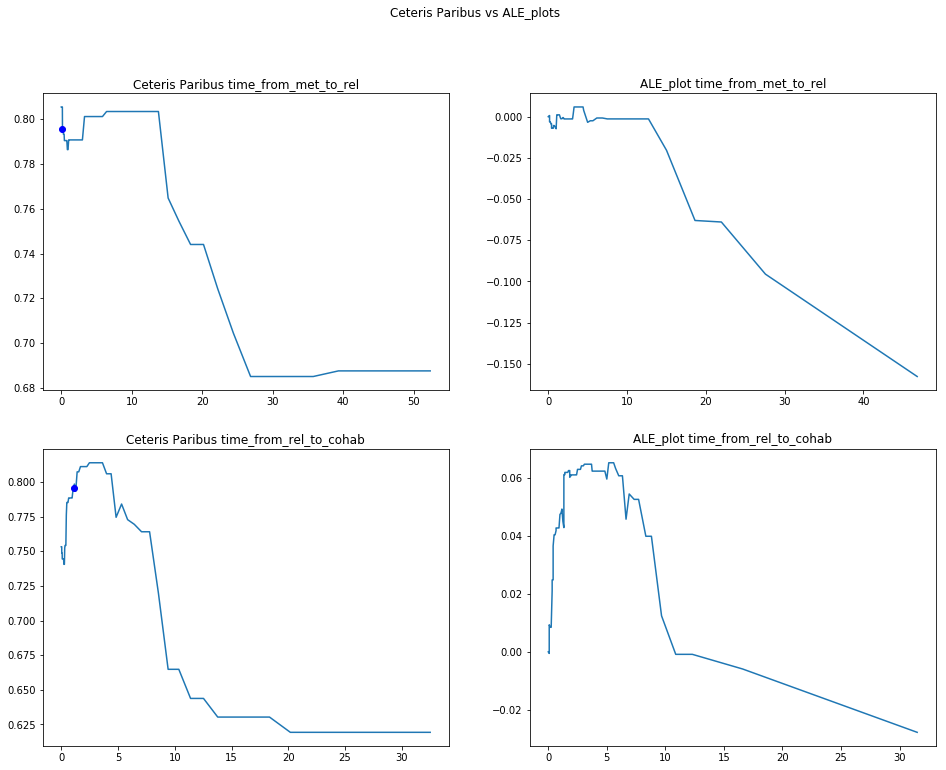

In [94]:
example = np.array([0.166748, 1.083374, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])
cp_tfmtr_x, cp_tfmtr_y = ceteris_paribus_log_scale(grid_search_classifier, example, 0, 55)
cp_tfrtc_x, cp_tfrtc_y = ceteris_paribus_log_scale(grid_search_classifier, example, 1, 33)

ale_tfmtr_x, ale_tfmtr_y = ALE_plot(grid_search_classifier, X_train, 'time_from_met_to_rel', 200)
ale_tfrtc_x, ale_tfrtc_y = ALE_plot(grid_search_classifier, X_train, 'time_from_rel_to_cohab', 200)


plt.figure()
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
f.suptitle('Ceteris Paribus vs ALE_plots')

ax1.plot(cp_tfmtr_x, cp_tfmtr_y)
ax1.plot(example[0], grid_search_classifier.predict_proba([example])[0][1], 'bo')
ax1.set_title("Ceteris Paribus time_from_met_to_rel")

ax2.plot(ale_tfmtr_x, ale_tfmtr_y)
ax2.set_title("ALE_plot time_from_met_to_rel")

ax3.plot(cp_tfrtc_x, cp_tfrtc_y)
ax3.plot(example[1], grid_search_classifier.predict_proba([example])[0][1], 'bo')
ax3.set_title("Ceteris Paribus time_from_rel_to_cohab")

ax4.plot(ale_tfrtc_x, ale_tfrtc_y)
ax4.set_title("ALE_plot time_from_rel_to_cohab")